# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [5]:
%%R
 
# Import data with R
df <- read_csv('merged.csv', show_col_types = FALSE)
df

# A tibble: 102 × 44
   `GHGRP ID` `Landfill ID` `Landfill Name`       State `Physical Address` City 
        <dbl>         <dbl> <chr>                 <chr> <chr>              <chr>
 1    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 2    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 3    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 4         NA           736 Appeal SLF            MD    <NA>               Lusby
 5         NA           736 Appeal SLF            MD    <NA>               Lusby
 6         NA           736 Appeal SLF            MD    <NA>               Lusby
 7         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
 8         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
 9         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
10    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
# ℹ 92 

In [6]:
# Import data in python
df_python = pd.read_csv('merged.csv')
df_python.head()

,GHGRP ID,Landfill ID,Landfill Name,State,Physical Address,City,County,Zip Code,lat,long,...,STATE,COUNTY,TRACT,BLOCK,GEOID_y,NAME,variable,estimate,moe,geometry
0,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,...,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B01002_001,46.7,1.6,"list(list(c(-76.930591, -76.930146, -76.928361..."
1,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,...,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B01003_001,6212.0,502.0,"list(list(c(-76.930591, -76.930146, -76.928361..."
2,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,...,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B19013_001,125298.0,11749.0,"list(list(c(-76.930591, -76.930146, -76.928361..."
3,NaN,736,Appeal SLF,MD,NaN,Lusby,Calvert,20657.0,38.381112,-76.438334,...,24,9,861003,3000,24009861003,"Census Tract 8610.03, Calvert County, Maryland",B01002_001,38.9,6.5,"list(list(c(-76.452533, -76.448208, -76.444544..."
4,NaN,736,Appeal SLF,MD,NaN,Lusby,Calvert,20657.0,38.381112,-76.438334,...,24,9,861003,3000,24009861003,"Census Tract 8610.03, Calvert County, Maryland",B01003_001,6548.0,914.0,"list(list(c(-76.452533, -76.448208, -76.444544..."


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




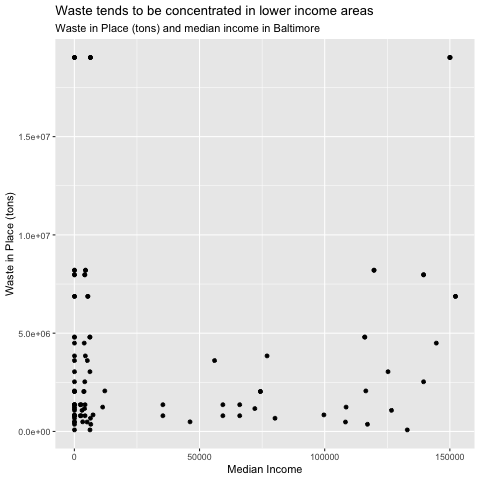

In [13]:
%%R

# code for scatter plot 1
# be sure to include a meaningful title and subtitle

# show Waste in Place (tons) and estimate in scatter plot
df %>%
  ggplot(aes(x = `estimate`, y = `Waste in Place (tons)`)) +
  geom_point() +
  labs(title = "Waste tends to be concentrated in lower income areas",
       subtitle = "Waste in Place (tons) and median income in Baltimore",
       x = "Median Income",
       y = "Waste in Place (tons)")
      







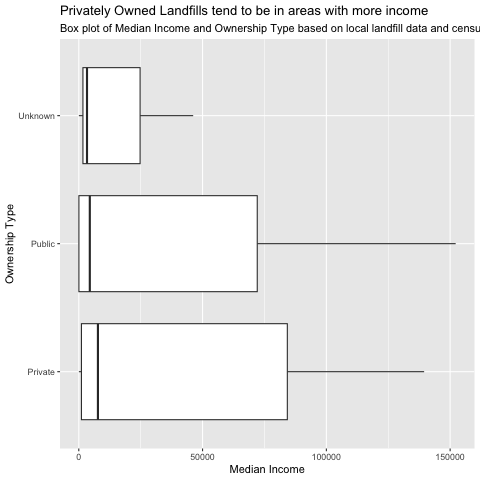

In [15]:
%%R

# code for scatter plot 2
# be sure to include a meaningful title and subtitle

# show ownership type and estimate in a box plot, filtered by ownership type

df %>% 
    ggplot(aes(x = `estimate`, y = `Ownership Type`)) +
    geom_boxplot() +
    labs(title = "Privately Owned Landfills tend to be in areas with more income",
         subtitle = "Box plot of Median Income and Ownership Type based on local landfill data and census data for 2021",
         x = "Median Income",
         y = "Ownership Type")

In [10]:
%%R

# code for scatter plot 3
# be sure to include a meaningful title and subtitle

 

NULL


In [11]:
%%R

# create new df of open landfills

open_landfills <- df %>%
    filter(`Current Landfill Status` == "Open")

open_landfills



# A tibble: 42 × 44
   `GHGRP ID` `Landfill ID` `Landfill Name`       State `Physical Address` City 
        <dbl>         <dbl> <chr>                 <chr> <chr>              <chr>
 1    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 2    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 3    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 4    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
 5    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
 6    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
 7    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
 8    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
 9    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
10    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
# ℹ 32 m

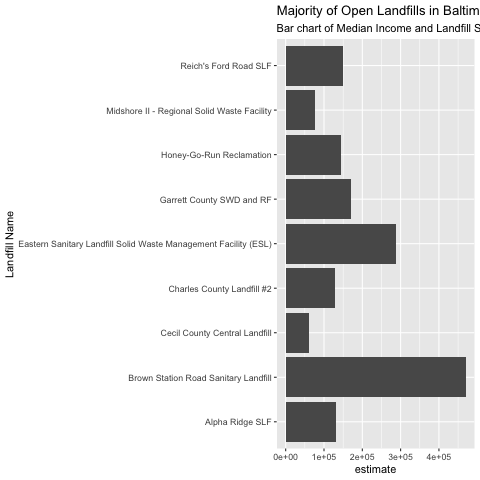

In [12]:
%%R

# bar chart of open landfills and estimate
# make it horizontal

open_landfills %>%
    ggplot(aes(x = `Landfill Name`, y = `estimate`)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(title = "Majority of Open Landfills in Baltimore are in areas with median income below $100,000",
         subtitle = "Bar chart of Median Income and Landfill Status based on local landfill data and census data for 2021")


